Reinforcement Learning: Assignment 1

Part 1

We start by looking at a simple bandit problem with stationary reward distributions. Consider the so-called k-armed testbed, with k = 10, with normally distributed rewards. Generate a set of ten means μ1,...,μ10 from a N(0,1) distribution and suppose that the arms 1 through 10 have N(μi,1) reward distributions where i = 1,...,10. You goal is to learn the action values corresponding to each of the 10 arms, i.e., the expected rewards q∗(a) for a = 1,...10 using the different methods we discussed fordoing so.

In [1]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Paramaeters
k=10                    #number of arms in bandit problem
steps=1000             #number of iteration for single run
episodes=1000           #number of runs
np.random.seed(100)     #set random value generation

In [3]:
# Generate random means u with N(0,1)
def random_means():
    return np.random.normal(0, 1, k)

In [4]:
#generate random means
u=random_means()

In [5]:
# Reward function wuth N(μi,1) reward distributions
def reward_func(u):
    return np.random.normal(u, 1)

In [6]:
# Optimal action check
def optimal_action(action):
    if action==np.argmax(u):
        return 1
    else:
        return 0

In [7]:
# greedy actions with non-optimistic initial values
def greedy(steps, k):
    Q = np.zeros(k)                #initialize Q table
    N = np.zeros(k)                #initialize action count
    rewards = np.zeros(steps)      #initialize rewards
    oas = np.zeros(steps)          #optimal actions
    
    for step in range(steps):
        action = np.argmax(Q)       #use max or the next element in array
        reward =reward_func(u[action])
        oa =optimal_action(action)  #check for optimal action
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards[step] = reward
        oas[step] = oa
    
    return rewards, oas

In [8]:
# epsilon-greedy actions with non-optimistic initial values
def epsilon_greedy(steps, k, epsilon):
    Q = np.zeros(k)                #initialize Q table
    N = np.zeros(k)                #initialize action count
    rewards = np.zeros(steps)      #initialize rewards
    oas = np.zeros(steps)          #optimal actions
    
    for step in range(steps):
        if np.random.rand() < epsilon: # randomly decide to take greedy action or explore
            action = np.random.choice(k)
        else:
            action = np.argmax(Q)   #use max or the next element in array

        reward =reward_func(u[action])
        oa =optimal_action(action)  #check for optimal action
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards[step] = reward
        oas[step] = oa
     
    return rewards, oas

In [9]:
# greedy actions with optimistic initial values
def greedy_with_SV(steps, k):
    # Q = np.full(k,np.mean(u))      #initialize Q table with average of u
    Q = np.full(k,2.0)               #initialize Q table with fixed value of 2.0
    N = np.zeros(k)                #initialize action count
    rewards = np.zeros(steps)      #initialize rewards
    oas = np.zeros(steps)          #optimal actions
    
    for step in range(steps):
        action = np.argmax(Q)       #use max or the next element in array
        reward =reward_func(u[action])
        oa =optimal_action(action)  #check for optimal action
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards[step] = reward
        oas[step] = oa
    
    return rewards, oas

In [10]:
# gradient bandit
def gradient_bandit(steps, k, alpha):
    H = np.zeros(k)               #preference
    Pi = np.zeros(k)              #action probabilities
    rewards = np.zeros(steps)
    average_rewards = 0             #can be set a baseline for improved performance
    oas = np.zeros(steps)          #optimal actions
    
    for step in range(steps):
        Pi = np.exp(H) / np.sum(np.exp(H))
        action = np.random.choice(k, p=Pi)
        reward = reward_func(u[action])
        oa =optimal_action(action)  #check for optimal action
        rewards[step] = reward
        oas[step] = oa
        average_rewards = np.mean(rewards)
        H[action] += alpha * (reward - average_rewards)*(1-Pi[action])
        for i in range(k):
            if i==action:
                pass
            else:
                H[i] -= alpha * (reward - average_rewards) * Pi[i]
    
    return rewards, oas

In [11]:
# Function to calculate running average
def running_average(arr):
    return np.cumsum(arr) / np.arange(1, len(arr) + 1)

In [12]:
#Run for multiple episodes
reward_array = np.zeros((4,steps))              # reward collection array
action_array = np.zeros((4,steps))              # optimal action collection array
terminal_reward = np.zeros((4,episodes))        # terminal reward initiation

for episodes in range(episodes):
    u=random_means()
    rd, act = greedy(steps, k)
    reward_array[0] += rd
    action_array[0] += act
    rd, act = epsilon_greedy(steps, k, 0.1)          #epsilon=0.1
    reward_array[1] += rd
    action_array[1] += act
    rd, act = greedy_with_SV(steps, k)               #Set variable taken as the average of all means
    reward_array[2] += rd
    action_array[2] += act
    rd, act = gradient_bandit(steps, k, 0.2)         #alpha=0.2
    reward_array[3] += rd
    action_array[3] += act


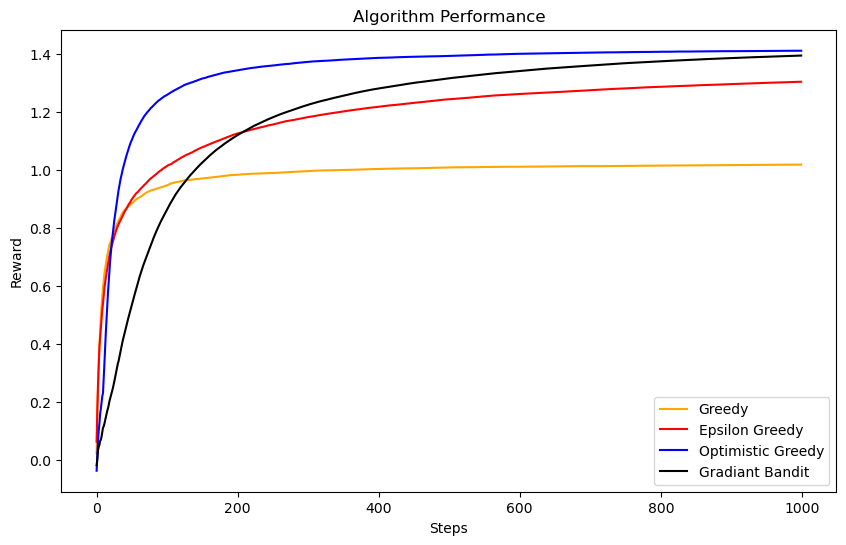

In [13]:
# Calculate the running average
running_avg1 = running_average(reward_array[0]/episodes)
running_avg2 = running_average(reward_array[1]/episodes)
running_avg3 = running_average(reward_array[2]/episodes)
running_avg4 = running_average(reward_array[3]/episodes)

# Plot the original array and the running average
plt.figure(figsize=(10, 6))
plt.plot(running_avg1, label='Greedy', color='orange')
plt.plot(running_avg2, label='Epsilon Greedy', color='red')
plt.plot(running_avg3, label='Optimistic Greedy', color='blue')
plt.plot(running_avg4, label='Gradiant Bandit', color='black')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Algorithm Performance')
plt.legend()
plt.show()

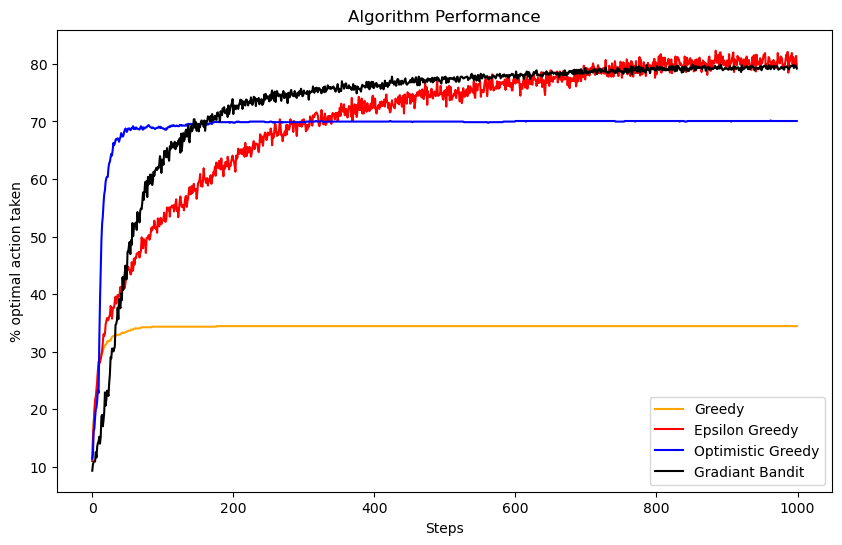

In [14]:
# Plot optimal action taken or not at each steps with all the episodes
plt.figure(figsize=(10, 6))
plt.plot(action_array[0]/episodes*100, label='Greedy', color='orange')
plt.plot(action_array[1]/episodes*100, label='Epsilon Greedy', color='red')
plt.plot(action_array[2]/episodes*100, label='Optimistic Greedy', color='blue')
plt.plot(action_array[3]/episodes*100, label='Gradiant Bandit', color='black')
plt.xlabel('Steps')
plt.ylabel('% optimal action taken')
plt.title('Algorithm Performance')
plt.legend()
plt.show()